# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Mar-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer and do not have epilepsy.

#### Report 3 - focus on the demographics of the research population; a. focus on age bands

In [124]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

# set month for covid reference line
covid = ("2022-04-01")

# set position for covid text
pos_text_covid = ("2022-03-01")

# set month for chart labels
pos_chart_labels = ("2022-10-01")

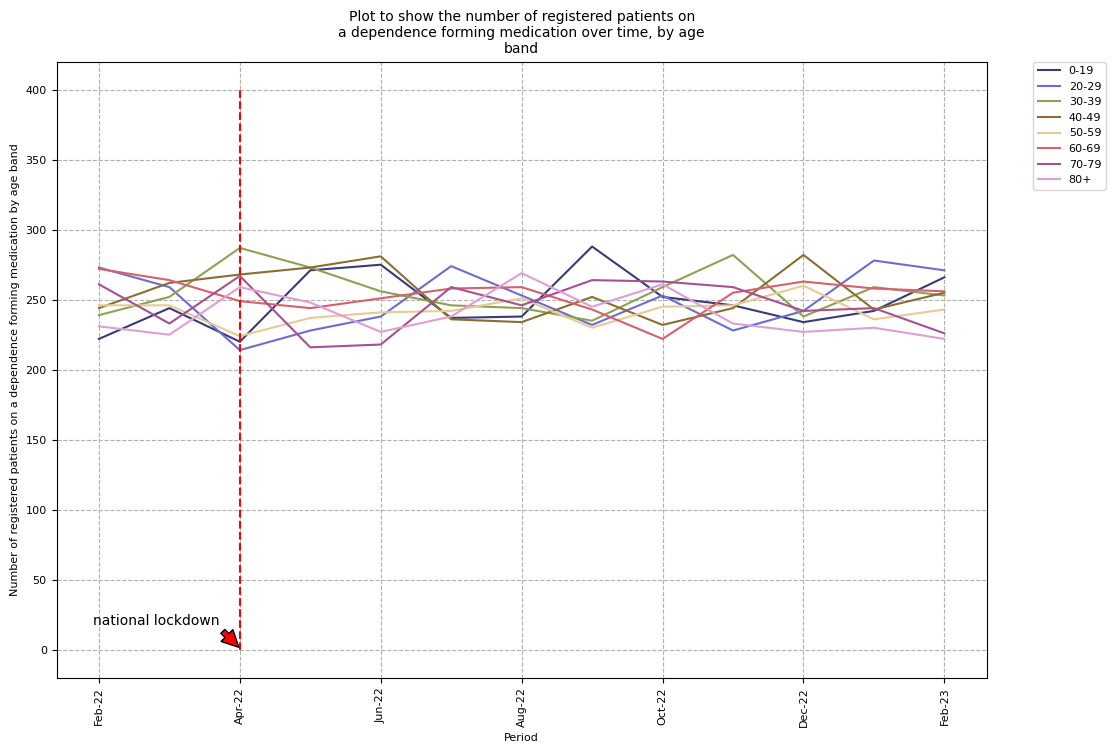

In [125]:
data_measure_dfm_medications_age_rate = pd.read_csv("../output/measure_dfm_medications_by_age_band_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_age_rate = data_measure_dfm_medications_age_rate.loc[data_measure_dfm_medications_age_rate["age_band"] != "missing", :]
df_measure_dfm_medications_age_rate = pd.DataFrame.pivot(data_measure_dfm_medications_age_rate, index='date', columns='age_band', values='research_population')
df_measure_dfm_medications_age_rate.index = pd.to_datetime(df_measure_dfm_medications_age_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_age_rate.plot(fontsize=8, figsize=(12,8), colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=400,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()



In [126]:
print(tabulate(df_measure_dfm_medications_age_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_age_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22     222      273      239      244      246      272      261    231
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-23     266      271      253      255      243      256      226    222


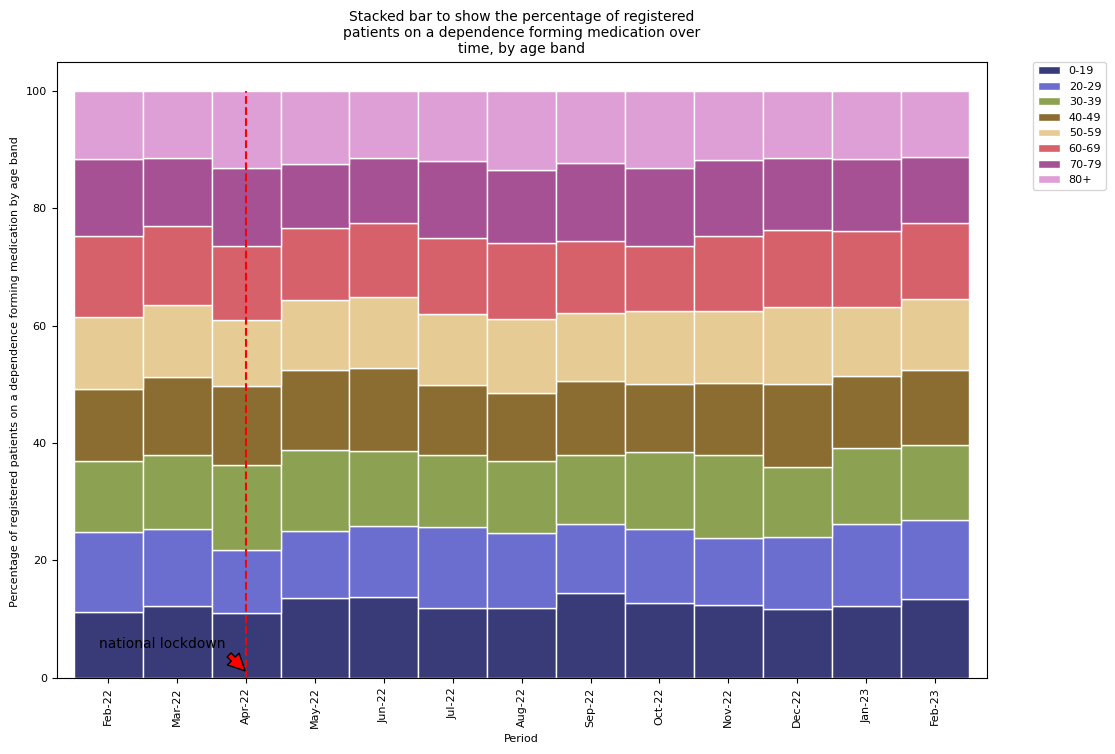

In [127]:
df_age_stacked = pd.DataFrame(df_measure_dfm_medications_age_rate)
df_age_stacked.head()
totam = df_age_stacked.sum(axis=1)
peram = df_age_stacked.div(totam, axis=0).mul(100).round(2)
ax = peram.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by age band ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [128]:
print(tabulate(peram.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peram.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   11.17    13.73    12.02    12.27    12.37    13.68    13.13  11.62
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-23   13.35     13.6     12.7     12.8     12.2    12.85    11.35  11.14


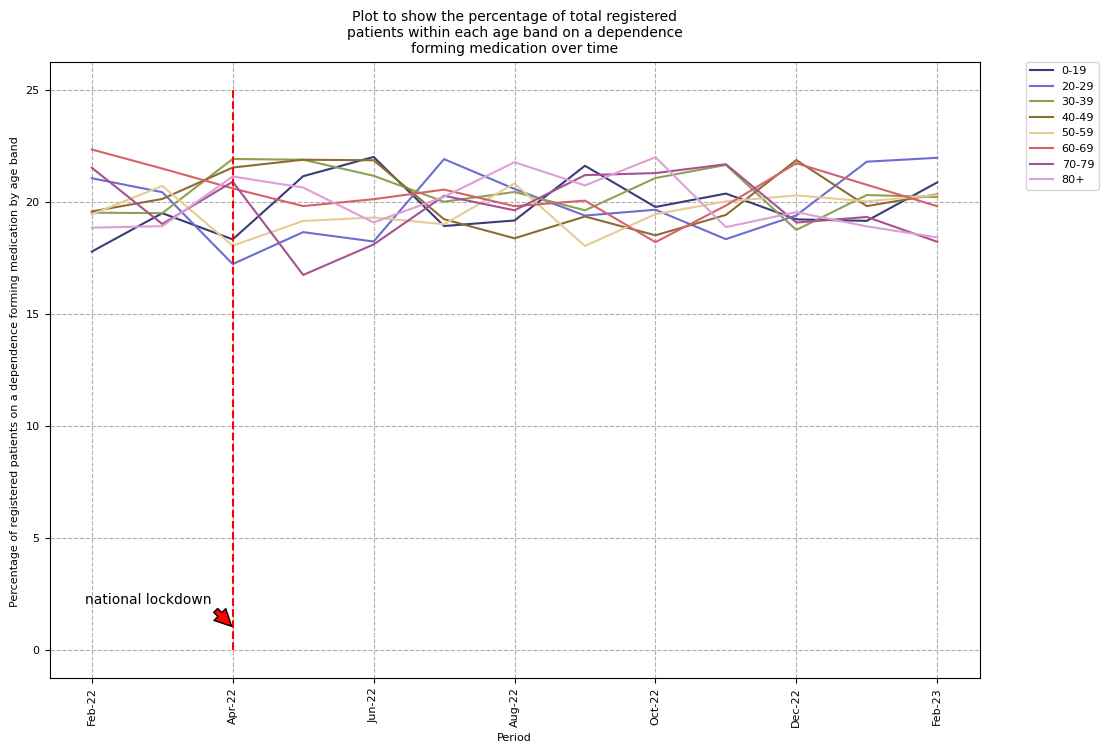

In [129]:
data_measure_dfm_medications_age_rate['value'] = 100 * data_measure_dfm_medications_age_rate['value']
df_measure_age_population_rate = pd.DataFrame.pivot(data_measure_dfm_medications_age_rate, index='date', columns='age_band', values='value')
df_measure_age_population_rate.index = pd.to_datetime(df_measure_age_population_rate.index).strftime('%b-%y')
ax = df_measure_age_population_rate.plot(fontsize=8, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by age band ', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the percentage of total registered patients within each age band on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_age_population_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [130]:
print(tabulate(df_measure_age_population_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_age_population_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Feb-22  17.7742  21.0486  19.5102   19.567  19.4313  22.3317  21.5169  18.8418
date       0-19    20-29    30-39    40-49    50-59    60-69    70-79     80+
------  -------  -------  -------  -------  -------  -------  -------  ------
Feb-23  20.8627  21.9611  20.2077  20.3349  20.3008  19.7989  18.2111  18.408


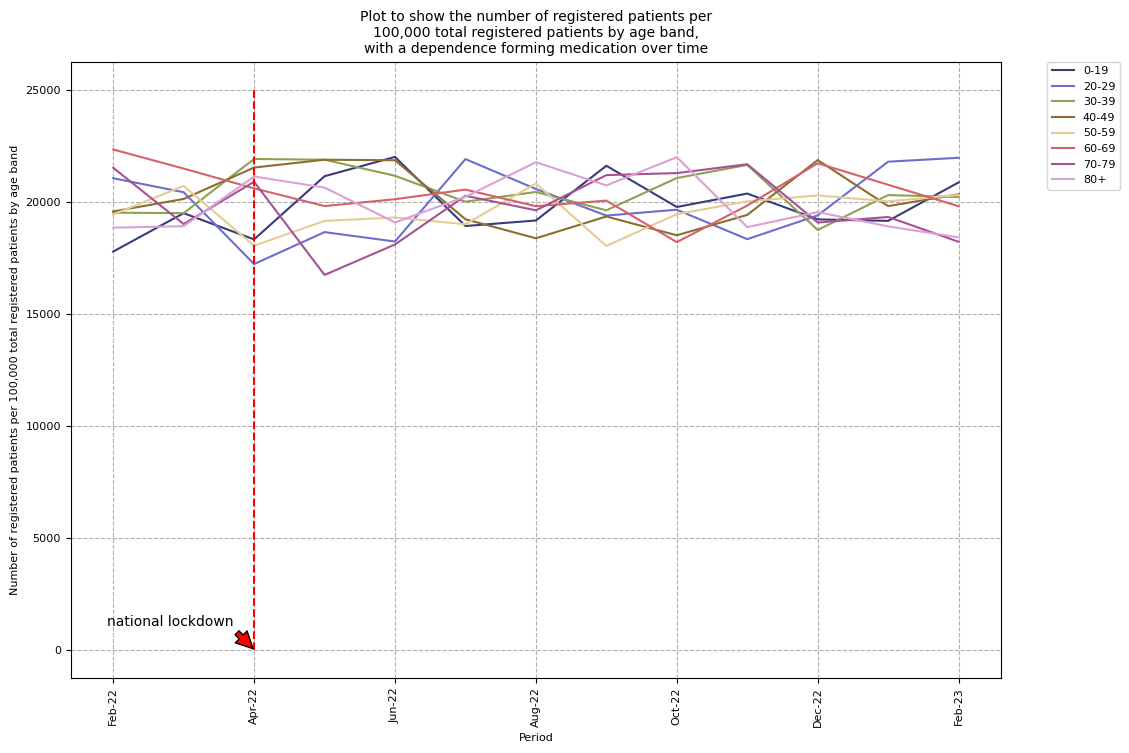

In [131]:
df_temp = pd.DataFrame(data_measure_dfm_medications_age_rate)
df_age_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_age_research_population = pd.DataFrame.pivot(df_age_research_population, index='date', columns='age_band', values='weighted_research_population')
df_age_research_population.index = pd.to_datetime(df_age_research_population.index).strftime('%b-%y')
ax = df_age_research_population.plot(fontsize=8, figsize=(12,8), colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_age_band_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [132]:
print(tabulate(df_age_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_age_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
------  -------  -------  -------  -------  -------  -------  -------  -------
Feb-22  17774.2  21048.6  19510.2    19567  19431.3  22331.7  21516.9  18841.8
date       0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  -------  -------  -------  -------  -------  -------  -------  -----
Feb-23  20862.7  21961.1  20207.7  20334.9  20300.8  19798.9  18211.1  18408


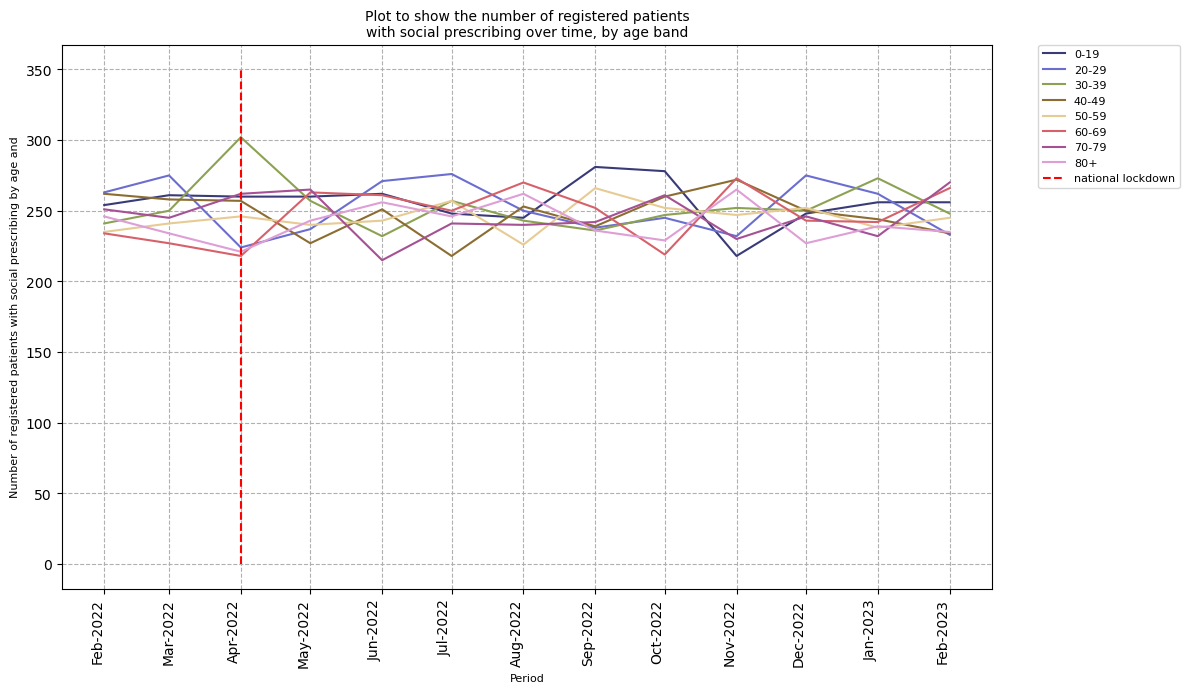

In [133]:
data_measure_social_prescribing_age_rate = pd.read_csv("../output/measure_compare_medications_by_age_band_socialrx_v_consultation_rate.csv", usecols=["date", "age_band", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_age_rate = data_measure_social_prescribing_age_rate.loc[data_measure_social_prescribing_age_rate["with_social_prescribing"] == 1, :]
data_measure_social_prescribing_age_rate = data_measure_social_prescribing_age_rate.loc[data_measure_social_prescribing_age_rate["age_band"] != "missing", :]
df = pd.DataFrame(data=data_measure_social_prescribing_age_rate)
df2 = df.groupby(['date', 'age_band']).population.sum().unstack()

N = 8
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by age and', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=350,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_age_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [134]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2022-02-01 00:00:00     254      263      241      262      235      234      251    246
date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2023-02-01 00:00:00     256      233      248      234      245      266      270    235


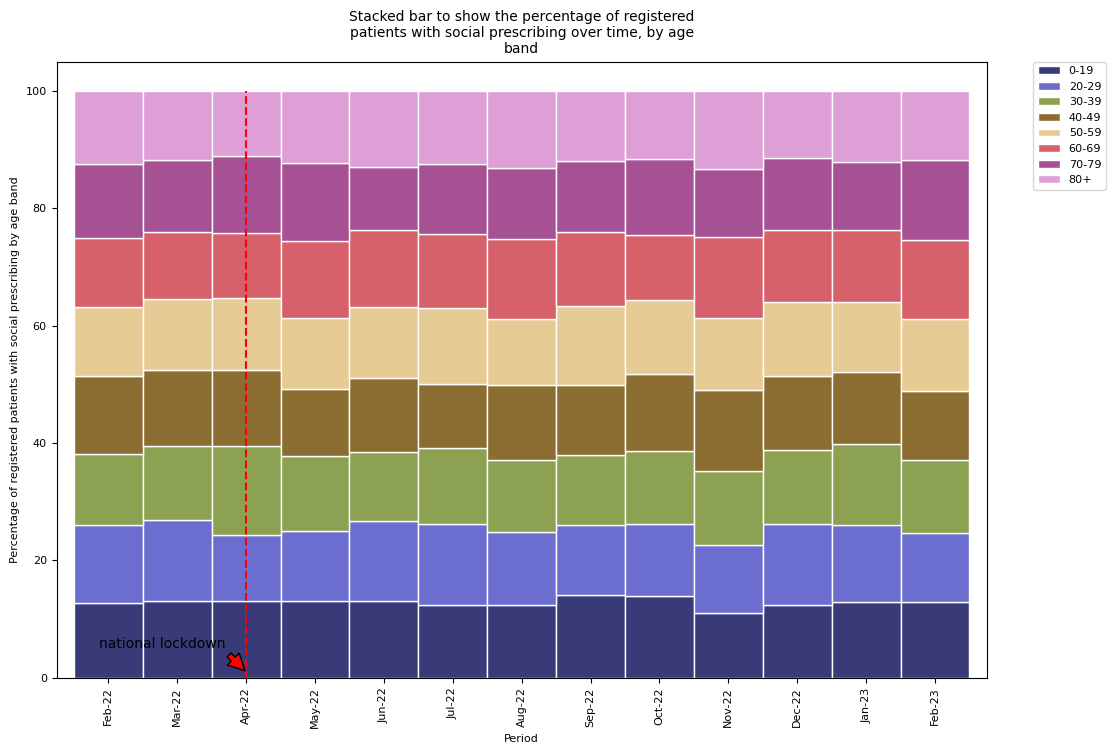

In [135]:
df_age_social_stacked = pd.DataFrame(df2)
df_age_social_stacked.head()
df_age_social_stacked.index = pd.to_datetime(df_age_social_stacked.index).strftime('%b-%y')
totas = df_age_social_stacked.sum(axis=1)
peras = df_age_social_stacked.div(totas, axis=0).mul(100).round(2)
ax = peras.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_age_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [136]:
print(tabulate(peras.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(peras.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   12.79    13.24    12.13    13.19    11.83    11.78    12.64  12.39
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-23   12.88    11.73    12.48    11.78    12.33    13.39    13.59  11.83


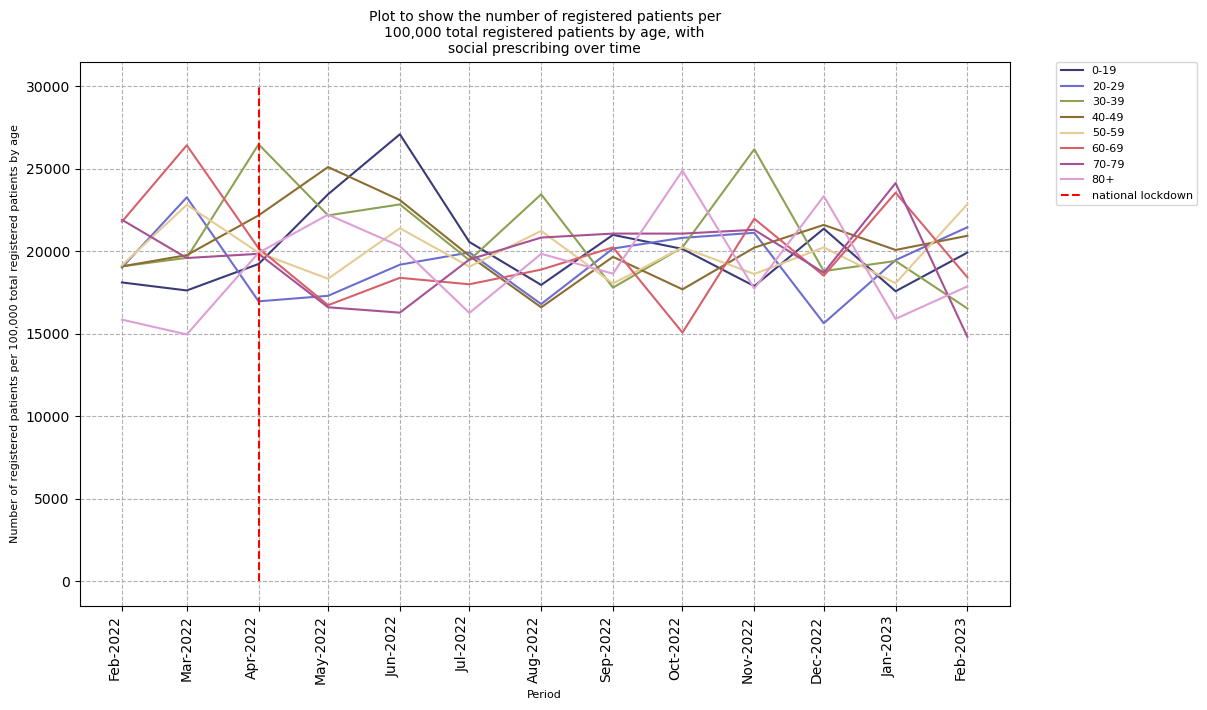

In [137]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'age_band']).research_population.sum().unstack() / df1.groupby(['date', 'age_band']).weighted_population.sum().unstack()

N = 8
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by age', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=30000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [138]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2022-02-01 00:00:00  18110.2  19011.4  19087.1    19084  19148.9  21794.9  21912.4  15853.7
date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2023-02-01 00:00:00  19921.9  21459.2  16532.3  20940.2  22857.1  18421.1  14814.8  17872.3


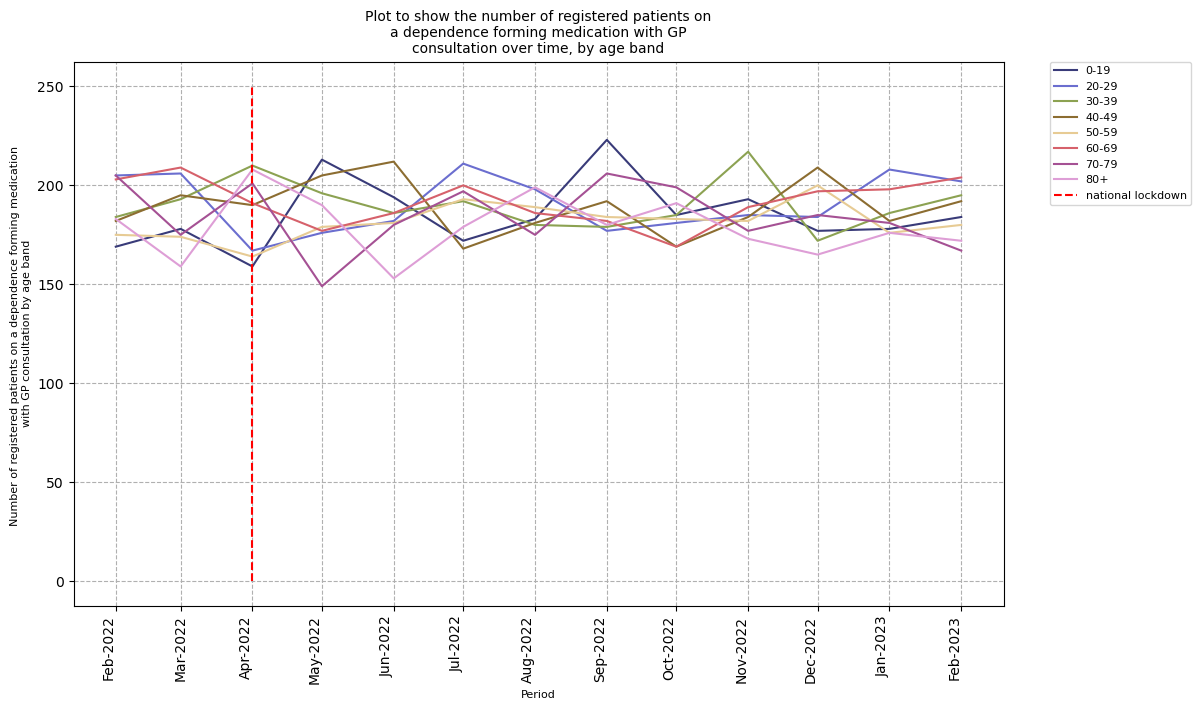

In [139]:
data_measure_consultation_age_rate = pd.read_csv("../output/measure_compare_medications_by_age_band_socialrx_v_consultation_rate.csv", usecols=["date", "age_band", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_age_rate = data_measure_consultation_age_rate.loc[data_measure_consultation_age_rate["with_consultation"] == 1, :]
data_measure_consultation_age_rate = data_measure_consultation_age_rate.loc[data_measure_consultation_age_rate["age_band"] != "missing", :]
df = pd.DataFrame(data=data_measure_consultation_age_rate)
df2 = df.groupby(['date', 'age_band']).research_population.sum().unstack()

N = 8
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by age band', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=250,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_rate_plot.png", bbox_inches='tight', dpi=150)
plt.show()


In [140]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2022-02-01 00:00:00     169      205      184      182      175      203      205    183
date                   0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
-------------------  ------  -------  -------  -------  -------  -------  -------  -----
2023-02-01 00:00:00     184      202      195      192      180      204      167    172


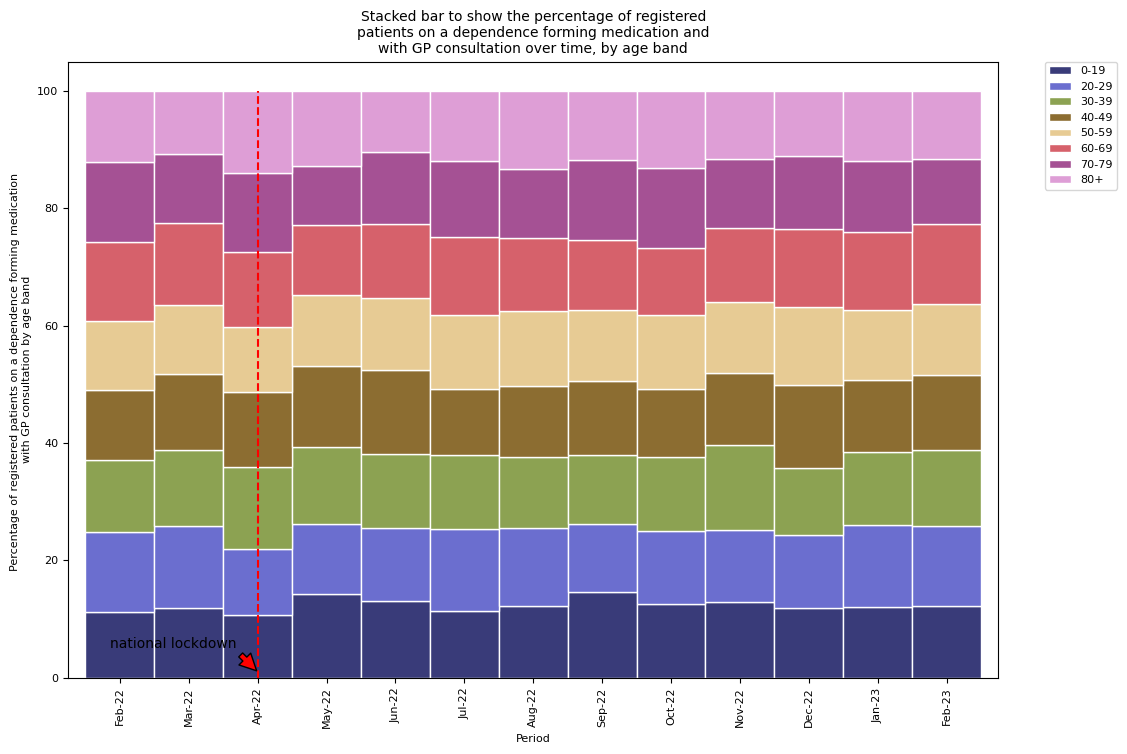

In [141]:
df_age_consult_stacked = pd.DataFrame(df2)
df_age_consult_stacked.head()
df_age_consult_stacked.index = pd.to_datetime(df_age_consult_stacked.index).strftime('%b-%y')
totac = df_age_consult_stacked.sum(axis=1)
perac = df_age_consult_stacked.div(totac, axis=0).mul(100).round(2)
ax = perac.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by age band', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by age band'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_age_rate_bar.png", bbox_inches='tight', dpi=150)
plt.show()

In [142]:
print(tabulate(perac.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perac.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-22   11.22    13.61    12.22    12.08    11.62    13.48    13.61  12.15
date      0-19    20-29    30-39    40-49    50-59    60-69    70-79    80+
------  ------  -------  -------  -------  -------  -------  -------  -----
Feb-23    12.3     13.5    13.03    12.83    12.03    13.64    11.16   11.5


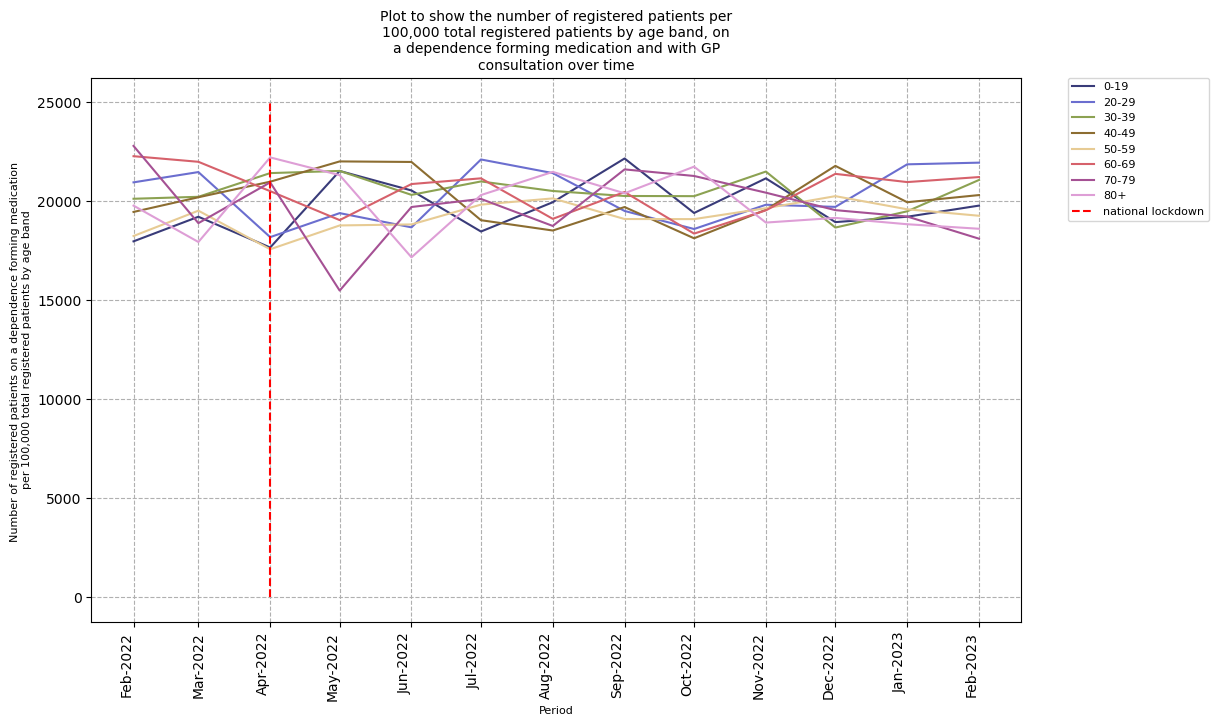

In [143]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'age_band']).research_population.sum().unstack() / df1.groupby(['date', 'age_band']).weighted_population.sum().unstack()

N = 8
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by age band', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by age band, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_age_weighted_plot.png", bbox_inches='tight', dpi=150)
plt.show()

In [144]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2022-02-01 00:00:00  17978.7  20961.1  20131.3  19465.2  18248.2  22283.2  22803.1  19783.8
date                    0-19    20-29    30-39    40-49    50-59    60-69    70-79      80+
-------------------  -------  -------  -------  -------  -------  -------  -------  -------
2023-02-01 00:00:00  19784.9  21956.5  21081.1  20317.5  19271.9  21227.9  18112.8  18614.7
